Построение модели нелинейной регрессии

[[7.5000000e+01 0.0000000e+00 5.8200000e+02 0.0000000e+00 2.0000000e+01
  1.0000000e+00 2.6500000e+05 1.9000000e+00 1.3000000e+02 1.0000000e+00
  0.0000000e+00 4.0000000e+00 1.0000000e+00 1.6000000e+02]
 [5.5000000e+01 0.0000000e+00 7.8610000e+03 0.0000000e+00 3.8000000e+01
  0.0000000e+00 2.6335803e+05 1.1000000e+00 1.3600000e+02 1.0000000e+00
  0.0000000e+00 6.0000000e+00 1.0000000e+00 1.0800000e+02]
 [6.5000000e+01 0.0000000e+00 1.4600000e+02 0.0000000e+00 2.0000000e+01
  0.0000000e+00 1.6200000e+05 1.3000000e+00 1.2900000e+02 1.0000000e+00
  1.0000000e+00 7.0000000e+00 1.0000000e+00 1.3000000e+02]
 [5.0000000e+01 1.0000000e+00 1.1100000e+02 0.0000000e+00 2.0000000e+01
  0.0000000e+00 2.1000000e+05 1.9000000e+00 1.3700000e+02 1.0000000e+00
  0.0000000e+00 7.0000000e+00 1.0000000e+00 7.8000000e+01]
 [6.5000000e+01 1.0000000e+00 1.6000000e+02 1.0000000e+00 2.0000000e+01
  0.0000000e+00 3.2700000e+05 2.7000000e+00 1.1600000e+02 0.0000000e+00
  0.0000000e+00 8.0000000e+00 1.0000000e+00 

Линейная модель:
MSE = 1.34
R2 = 0.03
Полиномиальная модель:
MSE = 1.32
R2 = 0.05


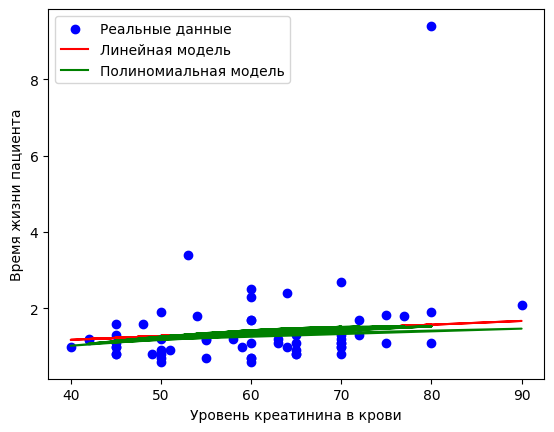

In [86]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Загружаем датасет
df = pd.read_csv("dts.csv")

# Выбираем переменные для регрессии
# В качестве зависимой переменной age
# В качестве независимой переменной serum...
X = df["age"].values.reshape(-1, 1)
y = df["serum_creatinine"].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Созд объект линейной регрессии
lin_reg = LinearRegression()

# Обучаем линейную модель на выборке
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

# метрики качества линейной модели
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Создаем объект полиномиальных признаков
poly = PolynomialFeatures(degree=2)

# Преобразуем данные в полиномиальные признаки
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Создаем объект полиномиальной регрессии
poly_reg = LinearRegression()

# Обуч полиномиальную модель на выборке
poly_reg.fit(X_poly_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_poly = poly_reg.predict(X_poly_test)

# Вычисляем метрики качества полиномиальной модели
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Выводим результаты полиномиальной модели
print("Линейная модель:")
print(f"MSE = {mse_poly:.2f}")
print(f"R2 = {r2_poly:.2f}")

# Выводим результаты линейной модели
print("Полиномиальная модель:")
print(f"MSE = {mse_lin:.2f}")
print(f"R2 = {r2_lin:.2f}")

# Строим графики линейной и полиномиальной моделей
plt.scatter(X_test, y_test, color="blue", label="Реальные данные")
plt.plot(X_test, y_pred_lin, color="red", label="Линейная модель")
plt.plot(X_test, y_pred_poly, color="green", label="Полиномиальная модель")
plt.xlabel("Уровень креатинина в крови")
plt.ylabel("Время жизни пациента")
plt.legend()
plt.show()



Оценка точности модели

In [72]:
# Определяем медиану времени жизни пациентов
median_time = np.median(y)

# положительныe отрицательнымe
y_test_pos = y_test >= median_time
y_pred_poly_pos = y_pred_poly >= median_time

#количество TP, TN, FP и FN
TP = np.sum(np.logical_and(y_test_pos, y_pred_poly_pos))
TN = np.sum(np.logical_and(~y_test_pos, ~y_pred_poly_pos))
FP = np.sum(np.logical_and(~y_test_pos, y_pred_poly_pos))
FN = np.sum(np.logical_and(y_test_pos, ~y_pred_poly_pos))

# точность модели
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Выводим результат
print(f"Точность модели = {accuracy:.2f}")


Точность модели = 0.59


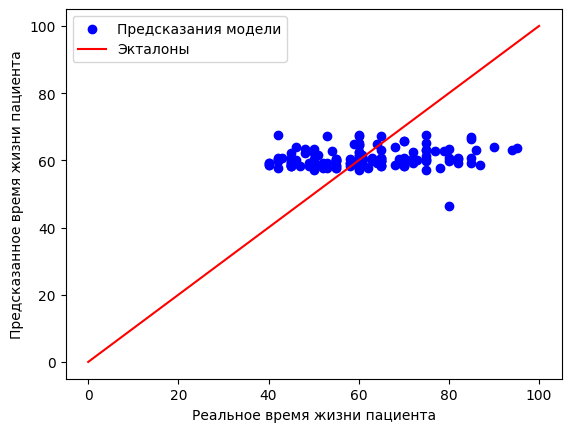

In [82]:
# Строим график сравнения предсказаний модели с экталонами
plt.scatter(y_test, y_pred_poly, color="blue", label="Предсказания модели")
plt.plot([0, 100], [0, 100], color="red", label="Экталоны")
plt.xlabel("Реальное время жизни пациента")
plt.ylabel("Предсказанное время жизни пациента")
plt.legend()
plt.show()


Построение уравнения регресии

In [85]:

from sklearn.preprocessing import PolynomialFeatures


#переменные для регрессии
X = df["serum_creatinine"].values.reshape(-1, 1)
y = df["age"].values.reshape(-1, 1)

# объект полиномиальных признаков
poly = PolynomialFeatures(degree=2)

# Преобразуем данные в полиномиальные признаки
X_poly = poly.fit_transform(X)

# Решаем систему нормальных уравнений
X_poly_T = X_poly.T # Транспонируем матрицу X_poly
X_poly_T_X_poly = np.dot(X_poly_T, X_poly) # Умножаем матрицу X_poly_T на матрицу X_poly
X_poly_T_X_poly_inv = np.linalg.inv(X_poly_T_X_poly) # Находим обратную матрицу X_poly_T_X_poly
X_poly_T_y = np.dot(X_poly_T, y) # Умножаем матрицу X_poly_T на вектор y
beta = np.dot(X_poly_T_X_poly_inv, X_poly_T_y) # Умножаем матрицу X_poly_T_X_poly_inv на вектор X_poly_T_y

# Выводим значения коэффициентов регрессии
print(f"beta_0 = {beta[0][0]:.2f}")
print(f"beta_1 = {beta[1][0]:.2f}")
print(f"beta_2 = {beta[2][0]:.2f}")


beta_0 = 53.83
beta_1 = 6.35
beta_2 = -0.61


Продвинутое задание

MSE = 751659.18
R2 = -1031020396.68


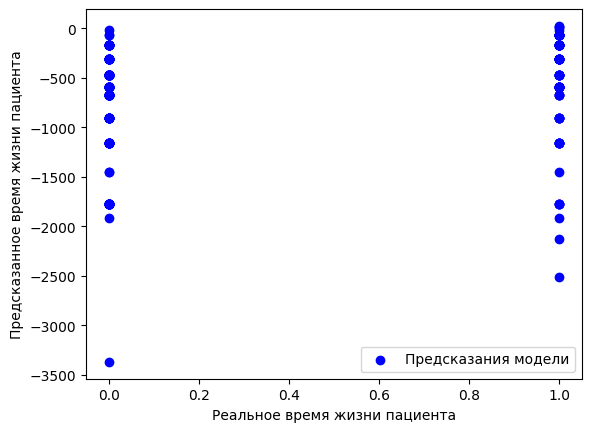

In [67]:

import math
import numpy as np
import matplotlib.pyplot as plt


data = np.genfromtxt("dts.csv", delimiter=",", skip_header=1)

# Выбираем переменные для регрессии
X = data[:, 4] # креатинин в крови
y = data[:, 12] # жизни пациента

# Добавляем единичный столбец к матрице X
X = np.c_[np.ones(X.shape[0]), X]

# Создаем матрицу полиномиальных признаков второй степени
X_poly = np.c_[X, X[:, 1] ** 2]


# Предсказываем значения на всей выборке
y_pred_poly = np.dot(X_poly, beta)

# Вычисляем метрики качества модели
mse_poly = np.mean((y - y_pred_poly) ** 2) # среднеквадратичная ошибка
r2_poly = 1 - np.sum((y - y_pred_poly) ** 2) / np.sum((y - np.mean(y)) ** 2) # коэффициент детерминации

# Выводим результаты модели
print(f"MSE = {mse_poly:.2f}")
print(f"R2 = {r2_poly:.2f}")

# Строим график сравнения предсказаний модели с экталонами
plt.scatter(y, y_pred_poly, color="blue", label="Предсказания модели")

plt.xlabel("Реальное время жизни пациента")
plt.ylabel("Предсказанное время жизни пациента")
plt.legend()
plt.show()
